<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;"></td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<img style="float: right;" src="https://avatars.githubusercontent.com/u/141567859?s=200&v=4">
    
<br>
<br>
<br>
<font size="8">QuantumQuipu/</font><br>
<br>
<br>
<font size="15"><b>QuantumScholars2023</b></font>
<br>
<br>
<br>
<br>
<br>

<div style="border-top: 20px solid #DE781F;"></div>

**Autor:** Gustavo Valdivia Mera\
**Institución:** University of Houston\
**Correo:** gvaldiviamera@uh.edu
          
Este material está sujeto a los términos y condiciones de la licencia
[Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/).\
 Se permite el uso gratuito para cualquier propósito no comercial.

*Puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/QuantumQuipu/QuantumScholars2023) y los videos de clase en nuestro canal de [Youtube](https://www.youtube.com/channel/UCze8vzQLcplutz0nWDNjFCA).*    

## Implementación

<img src="img/adj_3.png" width="80%" align="center">
    </td></tr>

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
import numpy as np

### Oráculo constante

Sea $x\in\{0,1\}^4$

<img src="img/adj_im1.png" width="80%" align="center">
    </td></tr>

In [2]:
oraculo_c = QuantumCircuit(5)
fx = np.random.randint(2)

if fx == 1:
    oraculo_c.x(4)
oraculo_c.barrier()

oraculo_c.draw()

░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
q_3: ──────░─
     ┌───┐ ░ 
q_4: ┤ X ├─░─
     └───┘ ░

### Oráculo balanceado

Sea $x\in\{0,1\}^4$

<img src="img/adj_im2.png" width="60%" align="center">
    </td></tr>

In [3]:
oraculo_b = QuantumCircuit(5)

oraculo_b.x(1)
oraculo_b.barrier()

for x in range(4):
    oraculo_b.cx(x,4)

oraculo_b.barrier()
oraculo_b.x(1)
oraculo_b.barrier()

oraculo_b.draw()

░                      ░       ░ 
q_0: ──────░───■──────────────────░───────░─
     ┌───┐ ░   │                  ░ ┌───┐ ░ 
q_1: ┤ X ├─░───┼────■─────────────░─┤ X ├─░─
     └───┘ ░   │    │             ░ └───┘ ░ 
q_2: ──────░───┼────┼────■────────░───────░─
           ░   │    │    │        ░       ░ 
q_3: ──────░───┼────┼────┼────■───░───────░─
           ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░       ░ 
q_4: ──────░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────░─
           ░ └───┘└───┘└───┘└───┘ ░       ░

## Algoritmo

## 1. Constante

In [4]:
qc=QuantumCircuit(5,4)
qc.x(4)
qc.h(4)
qc.barrier()

for x in range(4):
    qc.h(x)
qc.barrier()

qc=qc.compose(oraculo_c)
qc.barrier

for x in range(4):
    qc.h(x)
qc.barrier()

qc.measure([0,1,2,3],[0,1,2,3])
qc.draw()

░ ┌───┐ ░       ░ ┌───┐ ░ ┌─┐         
q_0: ───────────░─┤ H ├─░───────░─┤ H ├─░─┤M├─────────
                ░ ├───┤ ░       ░ ├───┤ ░ └╥┘┌─┐      
q_1: ───────────░─┤ H ├─░───────░─┤ H ├─░──╫─┤M├──────
                ░ ├───┤ ░       ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ───────────░─┤ H ├─░───────░─┤ H ├─░──╫──╫─┤M├───
                ░ ├───┤ ░       ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ───────────░─┤ H ├─░───────░─┤ H ├─░──╫──╫──╫─┤M├
     ┌───┐┌───┐ ░ └───┘ ░ ┌───┐ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├─░───────░─┤ X ├─░───────░──╫──╫──╫──╫─
     └───┘└───┘ ░       ░ └───┘ ░       ░  ║  ║  ║  ║ 
c: 4/══════════════════════════════════════╩══╩══╩══╩═
                                           0  1  2  3

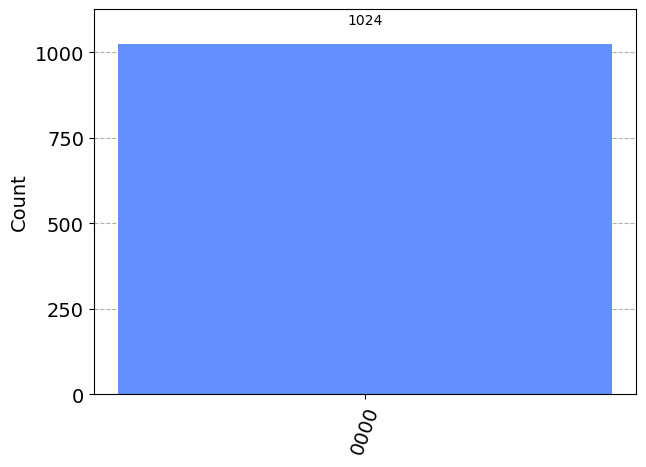

In [5]:
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(qc).result()
answer = results.get_counts()

plot_histogram(answer)

## 2. Balanceado

In [6]:
qcc=QuantumCircuit(5,4)
qcc.x(4)
qcc.h(4)
qcc.barrier()

for x in range(4):
    qcc.h(x)
qcc.barrier()

qcc=qcc.compose(oraculo_b)
qcc.barrier

for x in range(4):
    qcc.h(x)
qcc.barrier()

qcc.measure([0,1,2,3],[0,1,2,3])
qcc.draw()

░ ┌───┐ ░       ░                      ░       ░ ┌───┐ ░ ┌─┐   »
q_0: ───────────░─┤ H ├─░───────░───■──────────────────░───────░─┤ H ├─░─┤M├───»
                ░ ├───┤ ░ ┌───┐ ░   │                  ░ ┌───┐ ░ ├───┤ ░ └╥┘┌─┐»
q_1: ───────────░─┤ H ├─░─┤ X ├─░───┼────■─────────────░─┤ X ├─░─┤ H ├─░──╫─┤M├»
                ░ ├───┤ ░ └───┘ ░   │    │             ░ └───┘ ░ ├───┤ ░  ║ └╥┘»
q_2: ───────────░─┤ H ├─░───────░───┼────┼────■────────░───────░─┤ H ├─░──╫──╫─»
                ░ ├───┤ ░       ░   │    │    │        ░       ░ ├───┤ ░  ║  ║ »
q_3: ───────────░─┤ H ├─░───────░───┼────┼────┼────■───░───────░─┤ H ├─░──╫──╫─»
     ┌───┐┌───┐ ░ └───┘ ░       ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░       ░ └───┘ ░  ║  ║ »
q_4: ┤ X ├┤ H ├─░───────░───────░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────░───────░──╫──╫─»
     └───┘└───┘ ░       ░       ░ └───┘└───┘└───┘└───┘ ░       ░       ░  ║  ║ »
c: 4/═════════════════════════════════════════════════════════════════════╩══╩═»
                                                                          0  1 »
«           
«q_0: ──────
«           
«q_1: ──────
«     ┌─┐   
«q_2: ┤M├───
«     └╥┘┌─┐
«q_3: ─╫─┤M├
«      ║ └╥┘
«q_4: ─╫──╫─
«      ║  ║ 
«c: 4/═╩══╩═
«      2  3

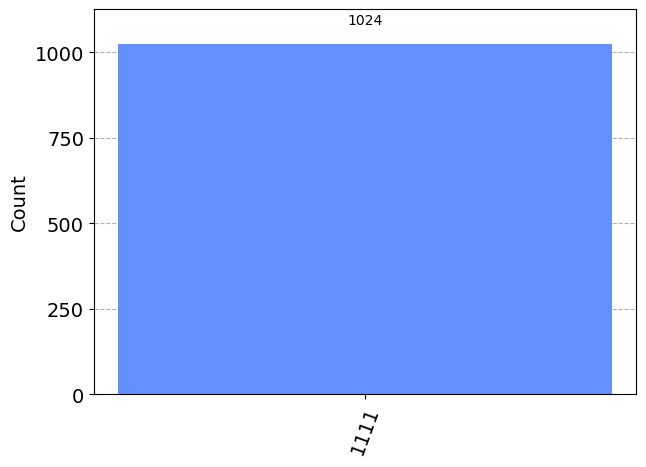

In [7]:
aer_si = Aer.get_backend('aer_simulator')
result = aer_si.run(qcc).result()
answe = result.get_counts()

plot_histogram(answe)

### Consulta al estudiante

¿Cómo implementarias un oráculo balanceado para $n=3$ de tal forma que se obtenga el siguiente comportamiento de $f(x)$?



---

## 5. Recursos útiles

[1] David Deutsch and Richard Jozsa (1992). "Rapid solutions of problems by quantum computation".\
Proceedings of the Royal Society of London A. 439: 553–558. [doi:10.1098/rspa.1992.0167](https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167).

[2] [Qiksit: Deutsch-Jozsa Algorithm](https://learn.qiskit.org/course/ch-algorithms/deutsch-jozsa-algorithm)

---

## Donaciones
<br>
Puedes donar una vez en el siguiente enlace (Ko-Fi)

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>